In [55]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [56]:
df = pd.read_csv('/content/sample_data/US_youtube_trending_data.csv')
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268782,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08T15:55:44Z,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,25,2024-04-15T00:00:00Z,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04T11:00:02Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2024-04-15T00:00:00Z,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ..."
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...
268785,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07T18:00:03Z,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,2024-04-15T00:00:00Z,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...


In [57]:
np.sum(df.isnull(), axis = 0)

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


In [58]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [59]:
df['description'].fillna('unavailable', inplace=True)

In [60]:
#split up the time
df['publishing_date']=df['publishedAt'].apply(lambda x: x.split('T')[0])
df['trending_d']=df['trending_date'].apply(lambda x: x.split('T')[0])
df['publishing_time']=df['publishedAt'].apply(lambda x: x.split('T')[1])
df['trending_time']=df['trending_date'].apply(lambda x: x.split('T')[1])
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publishing_date,trending_d,publishing_time,trending_time
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020-08-11,2020-08-12,19:20:14Z,00:00:00Z
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",2020-08-11,2020-08-12,17:00:10Z,00:00:00Z
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,2020-08-11,2020-08-12,16:34:06Z,00:00:00Z
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020-08-11,2020-08-12,16:38:55Z,00:00:00Z
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,2020-08-11,2020-08-12,15:10:05Z,00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268782,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08T15:55:44Z,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,25,2024-04-15T00:00:00Z,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...,2024-04-08,2024-04-15,15:55:44Z,00:00:00Z
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04T11:00:02Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2024-04-15T00:00:00Z,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ...",2024-04-04,2024-04-15,11:00:02Z,00:00:00Z
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...,2024-04-07,2024-04-15,14:53:25Z,00:00:00Z
268785,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07T18:00:03Z,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,2024-04-15T00:00:00Z,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...,2024-04-07,2024-04-15,18:00:03Z,00:00:00Z


In [61]:
df.dtypes

,0
video_id,object
title,object
publishedAt,object
channelId,object
channelTitle,object
categoryId,int64
trending_date,object
tags,object
view_count,int64
likes,int64


In [62]:
df.drop_duplicates()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publishing_date,trending_d,publishing_time,trending_time
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020-08-11,2020-08-12,19:20:14Z,00:00:00Z
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",2020-08-11,2020-08-12,17:00:10Z,00:00:00Z
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,2020-08-11,2020-08-12,16:34:06Z,00:00:00Z
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020-08-11,2020-08-12,16:38:55Z,00:00:00Z
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,2020-08-11,2020-08-12,15:10:05Z,00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268782,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08T15:55:44Z,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,25,2024-04-15T00:00:00Z,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...,2024-04-08,2024-04-15,15:55:44Z,00:00:00Z
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04T11:00:02Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2024-04-15T00:00:00Z,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ...",2024-04-04,2024-04-15,11:00:02Z,00:00:00Z
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...,2024-04-07,2024-04-15,14:53:25Z,00:00:00Z
268785,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07T18:00:03Z,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,2024-04-15T00:00:00Z,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...,2024-04-07,2024-04-15,18:00:03Z,00:00:00Z


<Axes: xlabel='view_count', ylabel='Count'>

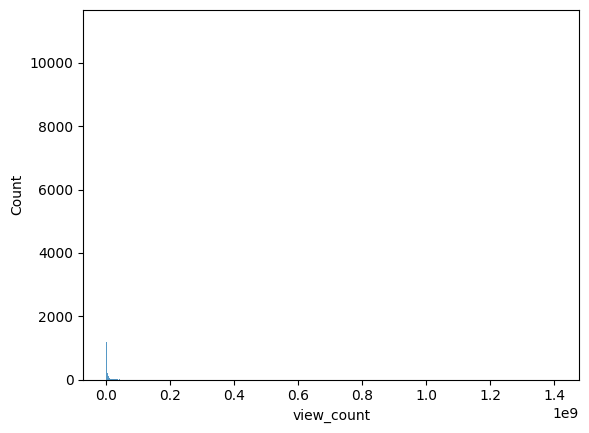

In [63]:
sns.histplot(data=df, x=df['view_count'])

<Axes: xlabel='view_count'>

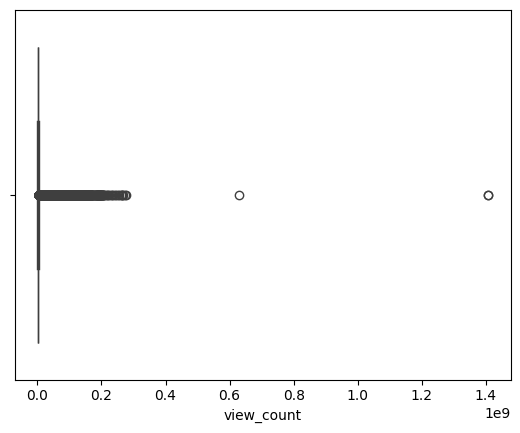

In [64]:
sns.boxplot(x=df['view_count'])

In [65]:
#fix outliers
z_scores= stats.zscore(df['view_count'])
df=df[(z_scores>-3) & (z_scores<3)]

In [66]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,266070.000000,2.660700e+05,2.660700e+05,266070.000000,2.660700e+05
mean,18.745886,2.002563e+06,1.000070e+05,923.297565,7.381274e+03
std,6.784387,3.288615e+06,2.101274e+05,4162.954577,2.699896e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.691252e+05,1.779400e+04,0.000000,1.270000e+03
50%,20.000000,9.235640e+05,3.957800e+04,0.000000,2.720000e+03
75%,24.000000,2.044193e+06,9.558975e+04,464.000000,6.215000e+03
max,29.000000,3.211474e+07,5.451546e+06,253992.000000,3.431431e+06


<Axes: xlabel='view_count', ylabel='likes'>

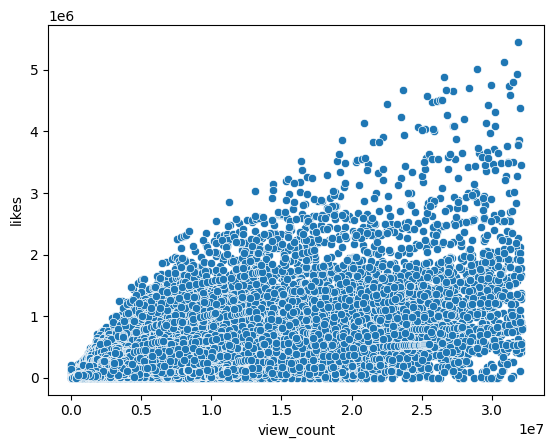

In [67]:
sns.scatterplot(data=df,x=df['view_count'], y=df['likes'])

<Axes: xlabel='view_count', ylabel='dislikes'>

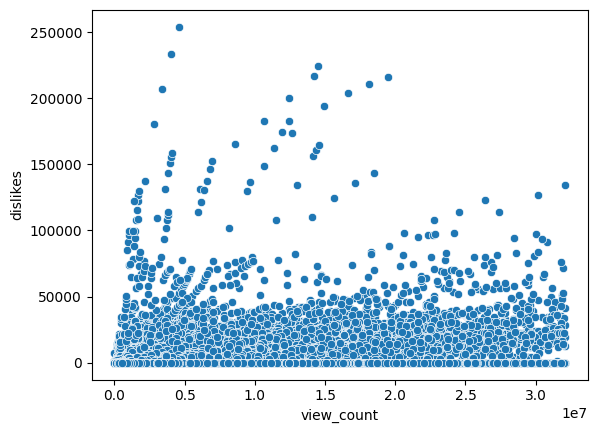

In [68]:
sns.scatterplot(data=df, x=df['view_count'], y=df['dislikes'])

<Axes: xlabel='publishing_time', ylabel='view_count'>

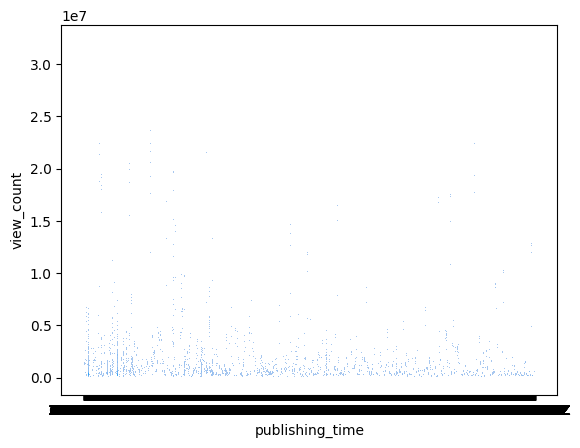

In [73]:
sns.histplot(data=df, x=df['view_count'], y=df['rating_disabled'])
#change to month, date, time seperate

<Axes: xlabel='view_count', ylabel='comments_disabled'>

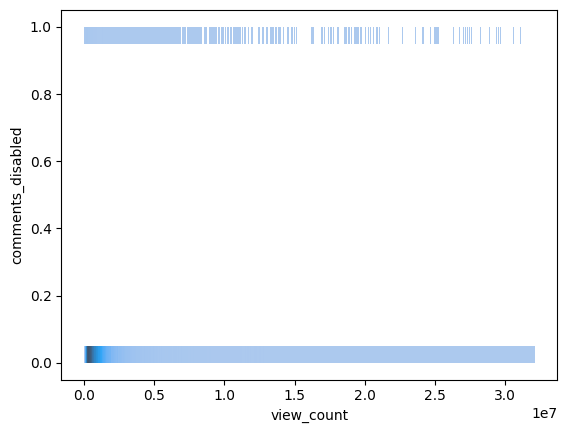

In [74]:
sns.histplot(data=df, x=df['view_count'], y=df['comments_disabled'])